## Artifact analysis of manually labeled data

This notebook analyzes the manually labeled data with information from a csv file with data of the labels.

Per artifact the file includes:

- start point
- end point
- position of the discontinuity
- one other point for calculating the slope



In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
artifacts = pd.read_csv('../data/artifacts/artifacts_ext_updated.CSV', sep=';') 


In [4]:
artifacts.head(22)

,start_x,start_y,end_x,end_y,other_point_x,other_point_y,position_x,Unnamed: 7
0,13133.0,0.326285,13163.0,0.265704,13139.0,0.704001,13139.0,NaN
1,13239.0,0.228547,13298.0,0.254014,13259.0,0.904992,13259.0,NaN
2,13676.0,0.304149,13682.0,0.304149,13681.0,0.265585,13681.0,NaN
3,15416.0,0.458328,15421.0,0.599344,15420.0,0.928858,15420.0,NaN
4,15517.0,0.389804,15522.0,0.389804,15521.0,0.446121,15521.0,NaN
5,15829.0,0.041496,15849.0,0.136757,15839.0,-0.812417,15839.0,NaN
6,16073.0,0.125265,16085.0,0.151310,16078.0,-0.094777,16078.0,NaN
7,16133.0,0.168417,16141.0,0.121713,16139.0,0.387893,16139.0,NaN
8,16260.0,0.258200,16269.0,0.307401,16261.0,0.635211,16260.0,NaN
9,16365.0,0.271688,16369.0,0.287189,16365.0,0.683031,16365.0,NaN


In [5]:
artifacts.drop(columns='Unnamed: 7', inplace=True)
artifacts.head()

,start_x,start_y,end_x,end_y,other_point_x,other_point_y,position_x
0,13133.0,0.326285,13163.0,0.265704,13139.0,0.704001,13139.0
1,13239.0,0.228547,13298.0,0.254014,13259.0,0.904992,13259.0
2,13676.0,0.304149,13682.0,0.304149,13681.0,0.265585,13681.0
3,15416.0,0.458328,15421.0,0.599344,15420.0,0.928858,15420.0
4,15517.0,0.389804,15522.0,0.389804,15521.0,0.446121,15521.0


In [6]:
artifacts.insert(len(artifacts.columns), 'width', 0)
artifacts.insert(len(artifacts.columns), 'speed', 0)
artifacts.insert(len(artifacts.columns), 'percentage_position', 0)
artifacts.head()

,start_x,start_y,end_x,end_y,other_point_x,other_point_y,position_x,width,speed,percentage_position
0,13133.0,0.326285,13163.0,0.265704,13139.0,0.704001,13139.0,0,0,0
1,13239.0,0.228547,13298.0,0.254014,13259.0,0.904992,13259.0,0,0,0
2,13676.0,0.304149,13682.0,0.304149,13681.0,0.265585,13681.0,0,0,0
3,15416.0,0.458328,15421.0,0.599344,15420.0,0.928858,15420.0,0,0,0
4,15517.0,0.389804,15522.0,0.389804,15521.0,0.446121,15521.0,0,0,0


In [7]:
artifacts["width"] = artifacts["end_x"] - artifacts["start_x"]
artifacts["percentage_position"] = (artifacts["position_x"] - artifacts["start_x"]) / (artifacts["end_x"] - artifacts["start_x"])

In [8]:
for row in range(len(artifacts)):
    if (artifacts['start_x'][row] == artifacts['position_x'][row]):
        artifacts["speed"][row] = (artifacts["end_y"][row] - artifacts["other_point_y"][row]) / (artifacts["end_x"][row] - artifacts["other_point_x"][row])
    else:
        artifacts["speed"][row] = (artifacts["other_point_y"][row] - artifacts["start_y"][row]) / (artifacts["other_point_x"][row] - artifacts["start_x"][row])

/tmp/ipykernel_5924/3045428253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artifacts["speed"][row] = (artifacts["other_point_y"][row] - artifacts["start_y"][row]) / (artifacts["other_point_x"][row] - artifacts["start_x"][row])
/tmp/ipykernel_5924/3045428253.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.06295263699999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  artifacts["speed"][row] = (artifacts["other_point_y"][row] - artifacts["start_y"][row]) / (artifacts["other_point_x"][row] - artifacts["start_x"][row])


In [9]:
artifacts.dropna(inplace=True)

In [10]:
len(artifacts)

123

In [11]:
print('mean width: ', artifacts["width"].mean(axis=0))
print('std width: ', artifacts["width"].std(axis=0))
print('max width: ', artifacts["width"].max(axis=0))
print('min width: ', artifacts["width"].min(axis=0))

print('mean speed: ', artifacts["speed"].abs().mean(axis=0))
print('std speed: ', artifacts["speed"].abs().std(axis=0))
print('max speed: ', artifacts["speed"].abs().max(axis=0))
print('min speed: ', artifacts["speed"].abs().min(axis=0))

print('mean position: ', artifacts["percentage_position"].mean(axis=0))
print('std position: ', artifacts["percentage_position"].std(axis=0))
print('max position: ', artifacts["percentage_position"].max(axis=0))
print('min position: ', artifacts["percentage_position"].min(axis=0))

mean width:  25.67479674796748
std width:  15.81890129806815
max width:  59.0
min width:  2.0
mean speed:  0.14335972371582273
std speed:  0.09718095555397406
max speed:  0.3866543214285714
min speed:  0.00023257699166666666
mean position:  0.3939834422076591
std position:  0.3033526410589024
max position:  1.0
min position:  0.0


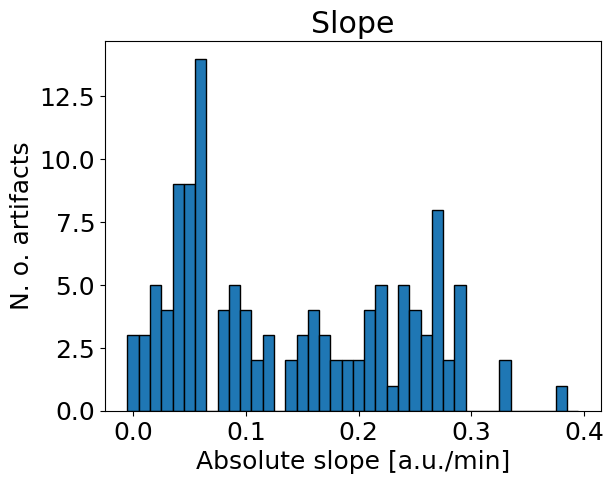

In [13]:
import matplotlib.pyplot as plt
import numpy as np

counts, edges = np.histogram(artifacts['speed'].abs(), bins=40, range=[0.0 , 0.4])
# Plot the histogram with the computed counts and edges
plt.bar(edges[:-1], counts, width=np.diff(edges), edgecolor='black')
#print(artifacts)
plt.xlabel('Absolute slope [a.u./min]') 
plt.ylabel("N. o. artifacts")
plt.title('Slope')
plt.rcParams.update({'font.size': 18})
plt.show()

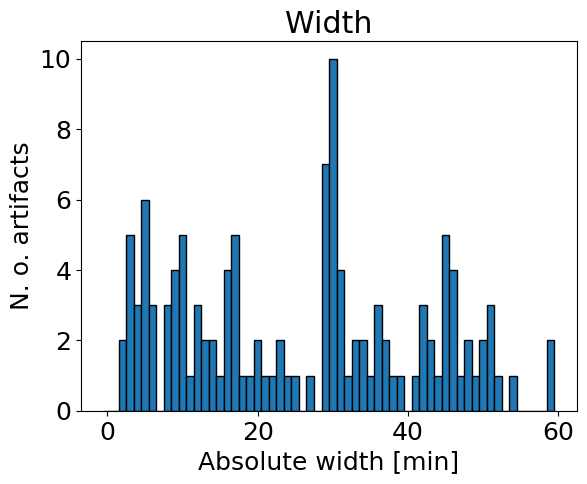

In [14]:
import matplotlib.pyplot as plt
import numpy as np

counts, edges = np.histogram(artifacts['width'].abs(), bins=60, range=[0 , 60])
#artifacts['speed'].abs().plot(kind='kde')
# Plot the histogram with the computed counts and edges
plt.bar(edges[:-1], counts, width=np.diff(edges), edgecolor='black')
#print(artifacts)
plt.xlabel('Absolute width [min]') 
plt.ylabel("N. o. artifacts")
plt.title('Width')
plt.rcParams.update({'font.size': 18})

plt.show()

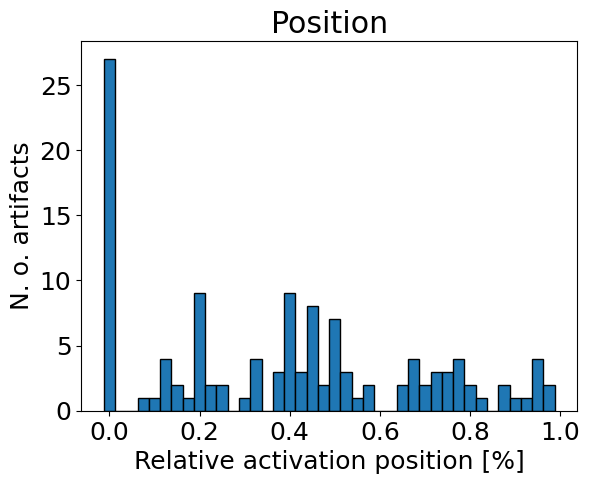

In [15]:
import matplotlib.pyplot as plt
import numpy as np

counts, edges = np.histogram(artifacts['percentage_position'].abs(), bins=40, range=[0 , 1])
#artifacts['speed'].abs().plot(kind='kde')
# Plot the histogram with the computed counts and edges
plt.bar(edges[:-1], counts, width=np.diff(edges), edgecolor='black')
#print(artifacts)
plt.xlabel('Relative activation position [%]') 
plt.ylabel("N. o. artifacts")
plt.title('Position')
plt.rcParams.update({'font.size': 18})

plt.show()

Not possible since original data not available

In [23]:
real_data_df = pd.read_csv('./data/raw/real/normalized_deviation_updated.csv') 
real_data_df = real_data_df.rename(columns={"Schedule deviation":"data"}, errors="raise")
len_dataset = len(real_data_df["data"])

In [24]:
gt = np.zeros(len(real_data_df["data"]))

In [25]:
for row in range(len(artifacts)):
    gt[int(artifacts.iloc[row]["start_x"]) : int(artifacts.iloc[row]["end_x"])] = 1

The file produced here is already stored in data/artifacts

In [26]:
df = pd.DataFrame(gt)
df.to_csv('../data/artifacts/gt_realData.csv', index=False)